# Problem 4.3

In [4]:
# imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

### Find the likely color components which generate the dataset.

In [6]:
data = None
with open('q4-resources/4_3.pkl', 'rb') as fobj:
    data = pickle.load(fobj)

In [3]:
data.shape

(100, 2)

In [26]:
num_clusters = 7
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(data)
old_means, old_covs = gmm.means_, gmm.covariances_

In [8]:
cluster_assignments = gmm.predict(data)
cluster_assignments

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

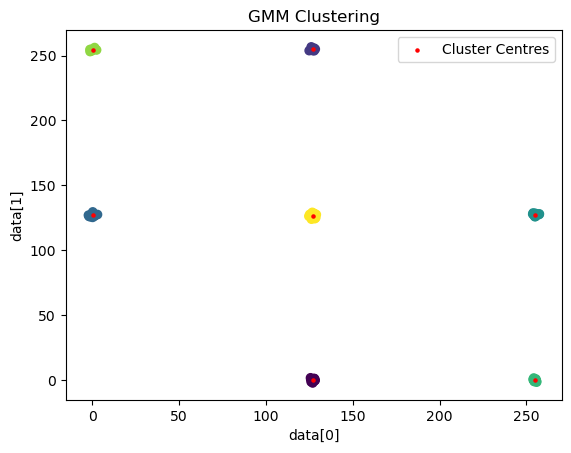

In [24]:
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', s = 5, label='Cluster Centres')
plt.title('GMM Clustering')
plt.xlabel('data[0]')
plt.ylabel('data[1]')
plt.legend()
plt.show()

### Create a function that generates sample data

In [47]:
def gen_dataset(n, means, covs, num_samples = 10000, random_state = 42):
    weights = [1/n] * n
    cluster_assignments = np.random.choice(n, size=num_samples, p=weights)
    dataset = []
    for i in cluster_assignments:
        dataset.append(np.random.multivariate_normal(means[i], covs[i]))
    return dataset

In [55]:
old_means[1] = [old_means[0][0]+10, old_means[0][1]]
new_data = gen_dataset(7, old_means, old_covs)

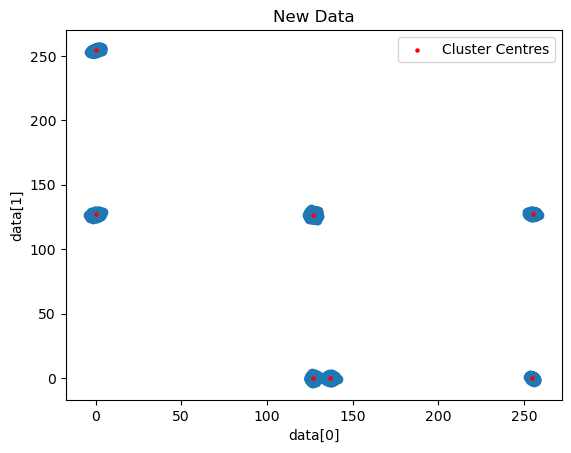

In [56]:
plt.scatter([i[0] for i in new_data], [i[1] for i in new_data])
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], color='red', s = 5, label='Cluster Centres')
plt.title('New Data')
plt.xlabel('data[0]')
plt.ylabel('data[1]')
plt.legend()
plt.show()

#### Observations
- The resulting dataset's look will be significantly influenced by the number of components, means, and covariances. Different setups will result in various patterns in the data.
- The uncertainty in GMMs is reflected in the final dataset, which may contain overlapped areas where data points from several components collide.